<a href="https://colab.research.google.com/github/kimdonggyufive/OpenReposit/blob/main/day2_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(777)
tf.random.set_seed(777)

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets)=mnist.load_data()

In [ ]:
train_data.shape, train_targets.shape

(60000, 28, 28)

In [ ]:
#Train 이미지가 뜻하는 값은 다음과 같다.
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

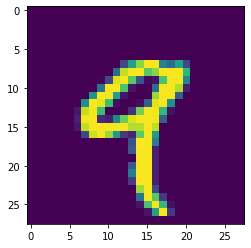

In [ ]:
#4번째 이미지를 digit에 담는다
digit = train_images[4]

plt.imshow(digit)
plt.show()

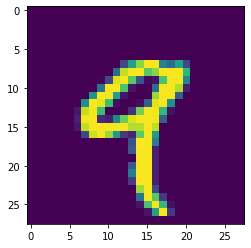

In [ ]:
#4번째 이미지를 digit에 담는다
digit = train_images[4]

plt.imshow(digit)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
#784 = 28*28의 이미지를 넣는다.
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dense(64, activation='relu'))
#결과 값은 다음과 같다.
#softmax는 분류를 하는 것이다.
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#학습 모델의 요약 정보를 본다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images=train_images.reshape(60000,28*28)


In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images=train_images.astype(np.float64)/255.

In [ ]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255

In [ ]:
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [ ]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
test_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.fit(train_images,train_labels, batch_size = 128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 1.3960 - accuracy: 0.6829
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5482 - accuracy: 0.8648
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4035 - accuracy: 0.8921
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3515 - accuracy: 0.9013
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3235 - accuracy: 0.9081


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
#seed값이 같음으로 시작 값은 같지만, 학습 방법에 w,b에 Random한 값을 넣어줌으로써 정확도 값은 지속적으로 변한다,
#따라서 정확한 값을 얻기 위해서는 계속 정확도가 높을 때까지 돌려보는 방법 밖에 없다.
print(f'loss={test_loss}, acc= {test_acc*100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 47.6399 - accuracy: 0.8334
loss=47.639949798583984, acc= 83.34%


In [ ]:
import random
#1~9999개 중 임의의 수가 들어감
r=random.randrange(len(test_labels))
r_images=test_images[r:r+1]
r_labels=test_labels[r:r+1]
#x에는 예측하고 싶은 값을 준다.
r_predict=model.predict(r_images)
print('P',np.argmax(r_predict), r_predict)
print('L',np.argmax(r_labels), r_labels)


P 0 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
L 0 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


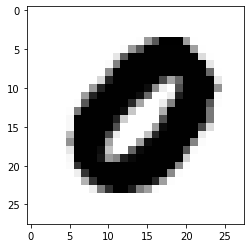

In [ ]:
import matplotlib.pyplot as plt
#이미지를 다시보기
#원본 이미지가 1차원으로 되어있으니 reshape으로 2차원으로 바꾼다.
plt.imshow(r_images.reshape(28,28),cmap=plt.cm.binary)